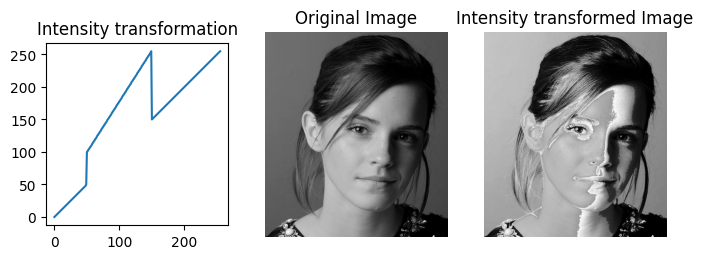

In [5]:
#Question 01
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread("emma.jpg", cv.IMREAD_GRAYSCALE)
assert img_orig is not None
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
assert len(t)==256
image_transformed = cv.LUT(img_orig, t)

fig, ax = plt.subplots(1, 3, figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")
plt.show()


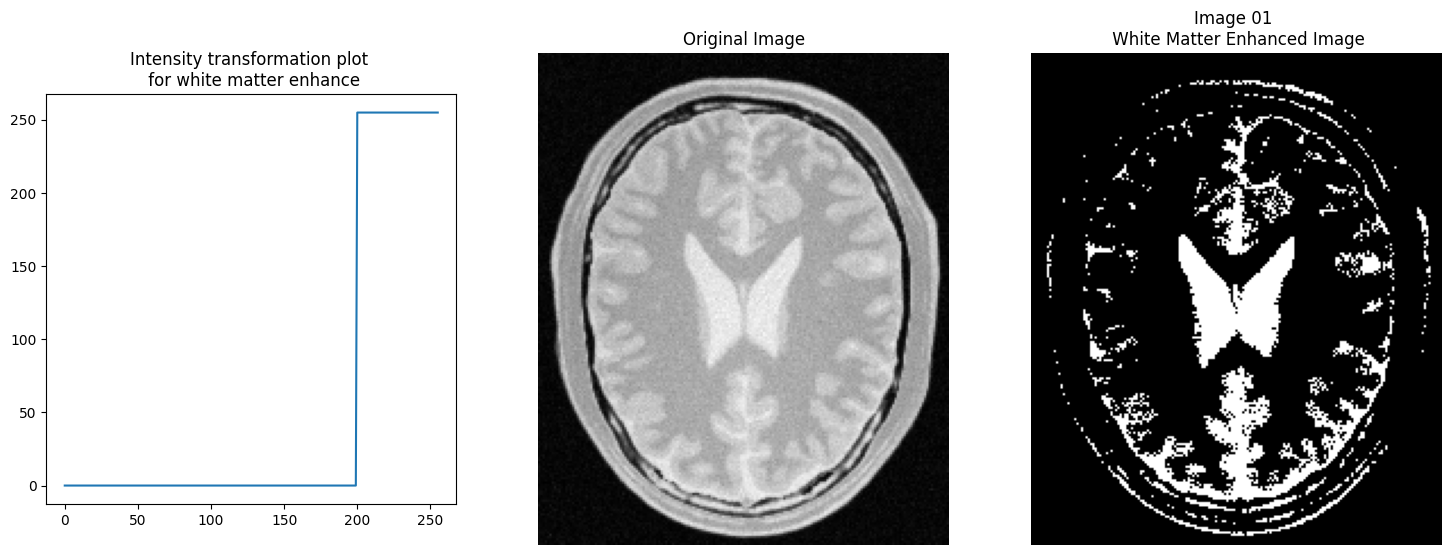

In [6]:
#Question 02 (b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_orig = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img_orig is not None
t1 = np.zeros(200)
t2 = 255*np.ones(56)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)

img_white_matter = cv.LUT(img_orig,t)

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation plot \n for white matter enhance")
ax[1].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(img_white_matter,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Image 01 \n White Matter Enhanced Image")
plt.show()

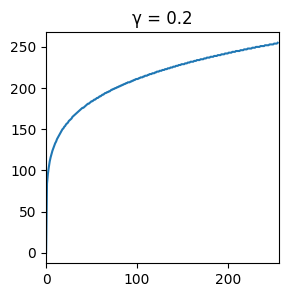

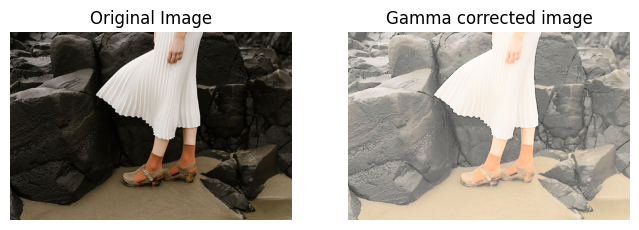

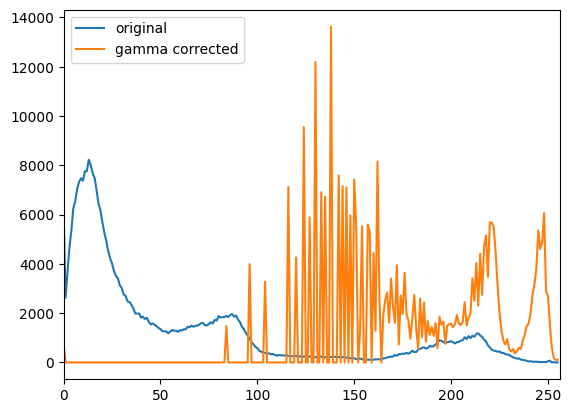

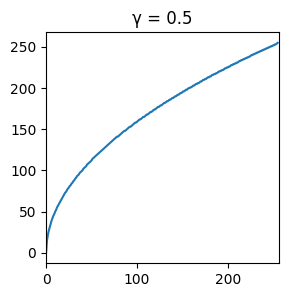

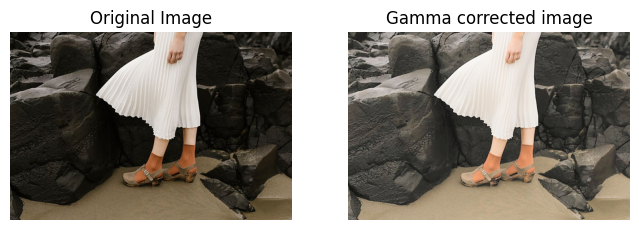

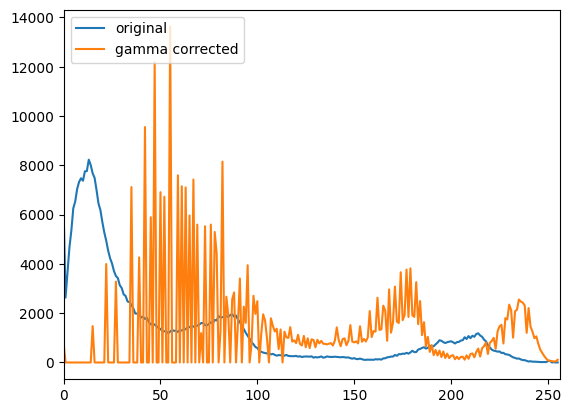

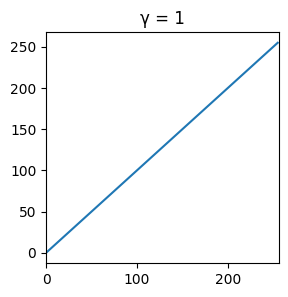

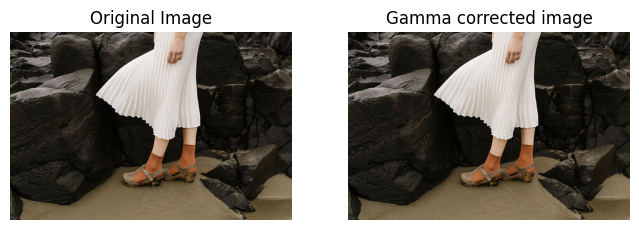

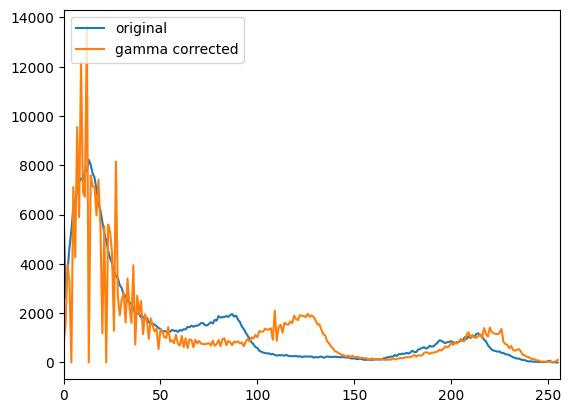

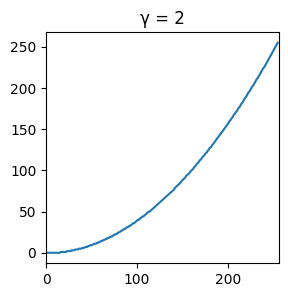

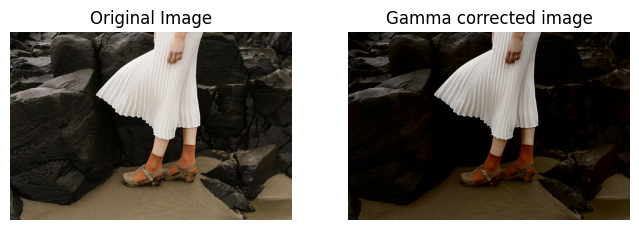

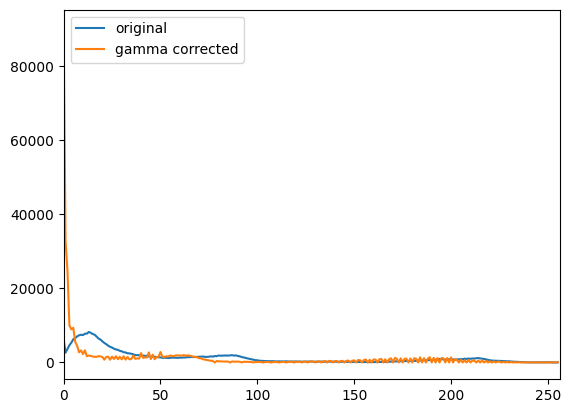

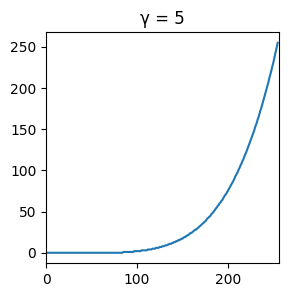

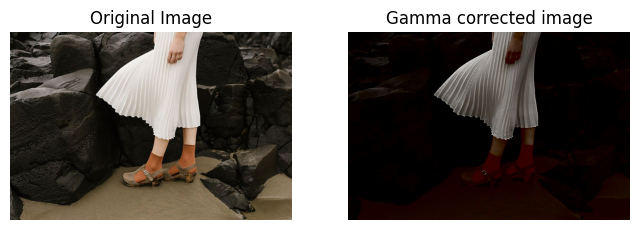

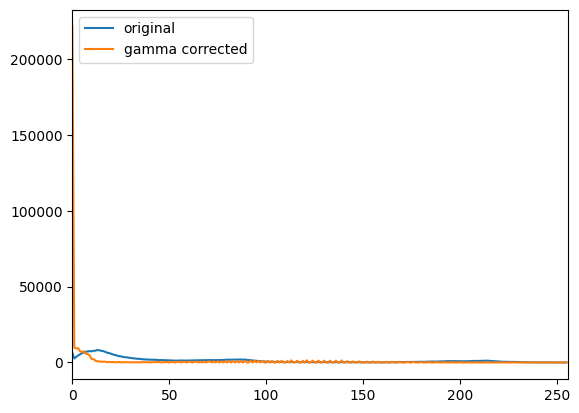

In [1]:
#Question 03 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.5, 1, 2, 5]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L,t)

    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title("\u03B3 = "+ str(i)), plt.xlim([0,256]), ax.plot(t)
    fig, ax = plt.subplots(1,2, figsize = (8,8))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image'), ax[0].axis('off')
    corrected_img = cv.merge([g, a, b])
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].set_title('Gamma corrected image'), ax[1].axis('off')
    plt.show()

    #Question 3 (b)
    hist1 = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist1), plt.xlim([0,256])
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
    plt.plot(hist2), plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper left')
    plt.show()

In [2]:
#Question_07
img = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")
ax[0].axis("off")

rows = img.shape[0]
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(255/(rows*cols))
    arr2[i] = round(arr2[i],0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

ax[1].imshow(img, cmap="gray"), ax[1].set_title("Histogram Equalized Image"), ax[1].axis("off"), plt.show()
plt.plot(arr1), plt.hist(img.flatten(),256,[0,256],color='r'), plt.legend(('Original Image Histogram','Equalized Image Histogram'),loc='upper right'), plt.xlim([0,256])
plt.show() 


NameError: name 'cv' is not defined